El formato de entrega será subir a u-cursos un Jupyter notebook laboratorio4.ipynb, que se debe ejecutar sin errores desde la primera celda a la última. Todo el código debe estar en el mismo notebook, el código debe estar comentado y el notebook debe estar escrito en forma de informe técnico, escribiendo una celda markdown antes de cada celda de código. **Recuerde escribir el nombre de todos los integrantes que trabajaron en la elaboración del entregable**.





**Integrantes**:
1. NN1
2. NN2
3. NN3

# Laboratorio 4: Clustering

Objetivos:



1.  Entender en qué casos se puede utilizar clustering y cuál es su fin
2.  Conocer y aplicar modelos de clustering
3.  Conocer y aplicar métricas relacionadas a clustering
4. Entender diferencia entre clustering y aprendizaje no supervisado




In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from math import pi
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
!wget https://raw.githubusercontent.com/Camiloez/Labs-Data-Mining/master/Iris.csv

--2018-10-30 13:17:22--  https://raw.githubusercontent.com/Camiloez/Labs-Data-Mining/master/Iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5107 (5.0K) [text/plain]
Saving to: ‘Iris.csv’

Iris.csv            100%[===================>]   4.99K  --.-KB/s    in 0s      

2018-10-30 13:17:22 (56.9 MB/s) - ‘Iris.csv’ saved [5107/5107]



In [0]:
!ls

Iris.csv  sample_data


In [0]:
df=pd.read_csv('Iris.csv')
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
x = df.iloc[:, [1, 2, 3, 4]].values
y = df.iloc[:,[5]].values

## PCA para visualización

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

pcadf = pd.DataFrame(data = principalComponents, columns = ['PCA 1', 'PCA 2'])
pcadf['target']=y

In [0]:
pcadf.head(5)

,PCA 1,PCA 2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa


In [0]:
pcadf.target.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
def color(x):
  if x=='Iris-setosa':
    return 'red'
  elif x=='Iris-versicolor':
    return 'blue'
  elif x=='Iris-virginica':
    return 'green'

In [0]:
pcadf['color']=pcadf.target.apply(color)
pcadf.head(5)

,PCA 1,PCA 2,target,color
0,-2.684207,0.326607,Iris-setosa,red
1,-2.715391,-0.169557,Iris-setosa,red
2,-2.889820,-0.137346,Iris-setosa,red
3,-2.746437,-0.311124,Iris-setosa,red
4,-2.728593,0.333925,Iris-setosa,red


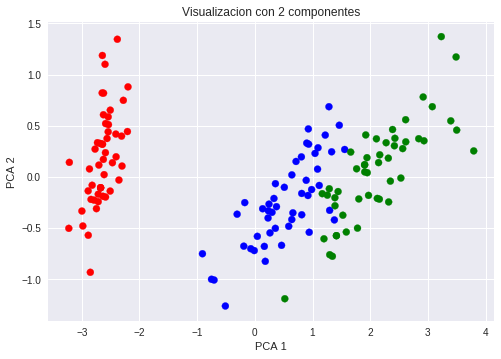

In [0]:
plt.scatter(pcadf['PCA 1'], pcadf['PCA 2'], c=pcadf.color)
plt.title('Visualizacion con 2 componentes')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## K-Means

In [0]:
kmeans = KMeans(n_clusters= 4
                , init='k-means++', random_state=0)
y_kmeans=kmeans.fit(x)
y_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [0]:
#Centroides
y_kmeans.cluster_centers_

array([[5.53214286, 2.63571429, 3.96071429, 1.22857143],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [6.2525    , 2.855     , 4.815     , 1.625     ]])

In [0]:
#Inertia para el método del codo
y_kmeans.inertia_

57.31787321428571

###  Visualización Centroides

In [0]:
Attributes =list(df.columns.values[1:5])
AttNo = len(Attributes)
values = df.iloc[3,1:5].tolist()
print(values)
values += values[:1]
angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

[4.6, 3.1, 1.5, 0.2]


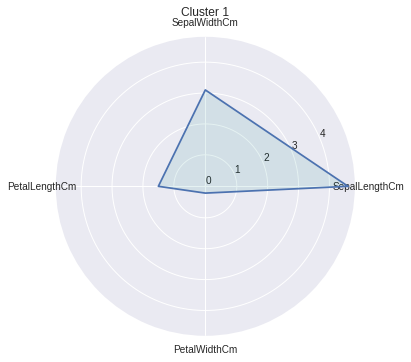

In [0]:
ax = plt.subplot(111, polar=True)

#Agregar las labels
plt.xticks(angles[:-1],Attributes)

#Plottear el radar
ax.plot(angles,values)

#Relleno de áreas calculadas
ax.fill(angles, values, 'teal', alpha=0.1)
ax.set_title("Cluster 1")
plt.show()

## Hierarchical Clustering

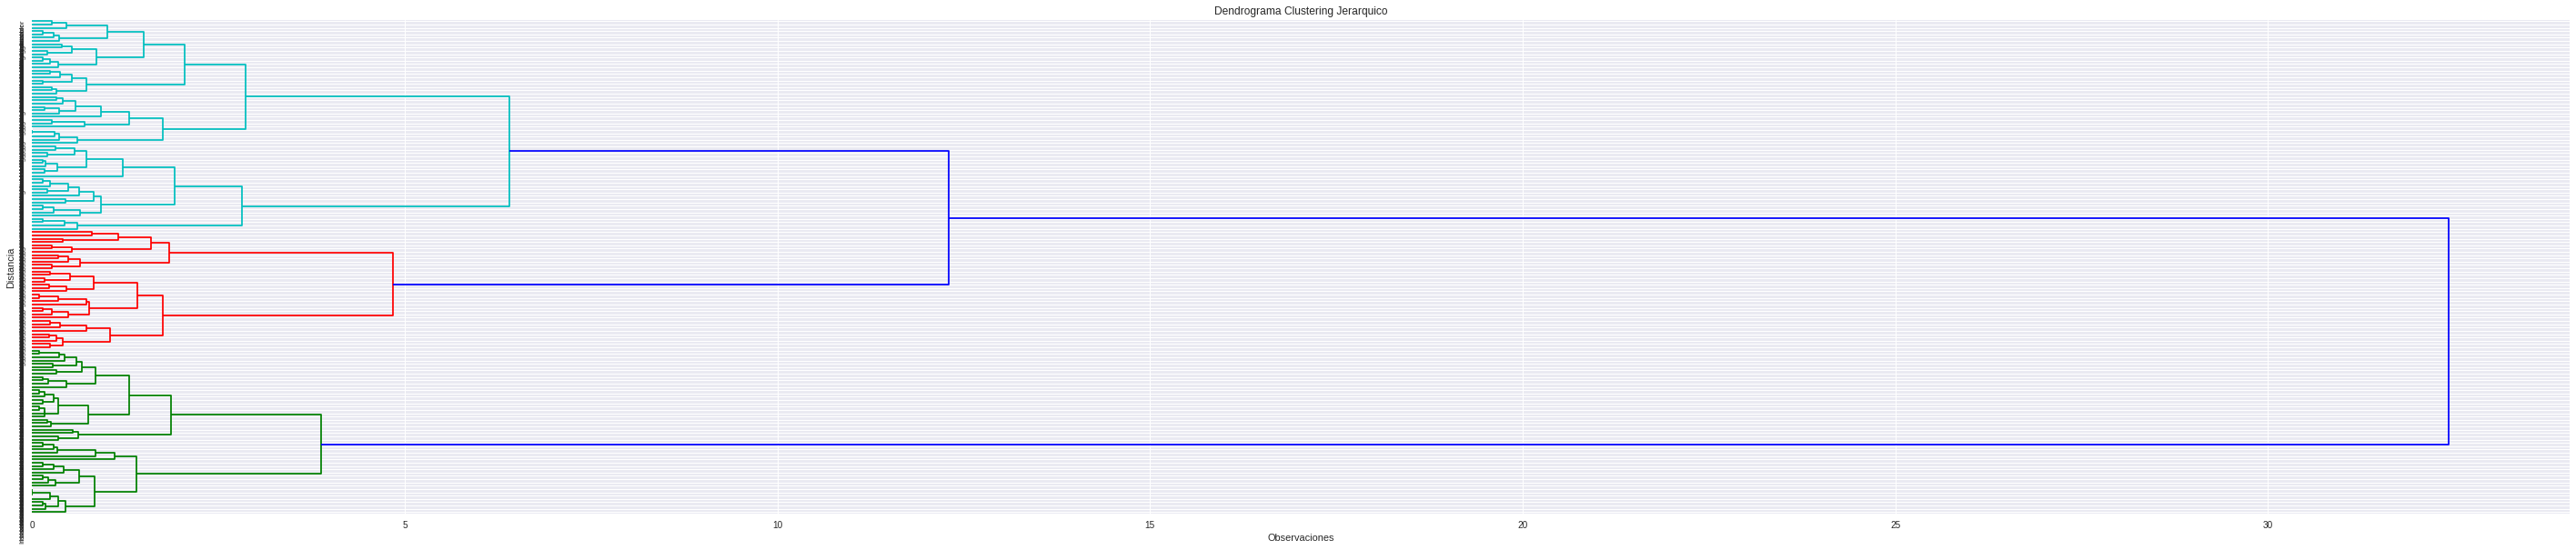

In [0]:
colors=list(pcadf.color)
Z = linkage(x, 'ward')
plt.figure(figsize=(50, 10))
plt.title('Dendrograma Clustering Jerarquico')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')


dendrogram(Z,
    labels=list(df.Species),
    leaf_rotation=90.,
    leaf_font_size=8.,
    orientation='right',
    color_threshold=10,
)
plt.show()

# Investigación (2 ptos)

Elija 3 de 4 preguntas, si responde todas se considerarán las tres mejores.



1. Explique un caso en que pueda fallar K-Means y mencione una forma de solucionarlo.
2. ¿Es PCA un método de clustering? Explique.
3. Investigue las siguientes métricas: *purity, silhouette score.* Describa ventajas y desventajas.
4. ¿En qué consiste el algoritmo Gaussian Mixture Models (GMM)? Comente su relación con K-Means.



# Laboratorio (4 ptos)


Considere el problema que enfrenta una empresa del retail que desea segmentar a sus clientes con el fin de entender mejor su comportamiento y así poder realizar ofertas específicas para cada grupo. 

Para lo anterior cuenta con los siguientes datos:


1.   Edad, género, educación, lugar dónde vive, teléfono, etc,
2.   Si es miembro o no del club de puntos, gastos realizados en un año, y una métrica otorgada (spending score) por el departamento de marketing que indica qué tan buenos gastadores son, donde 100 corresponde a lo más alto y 0 a lo más bajo. 

**Notas:**

1.   No posee registro de los gastos de quienes no pertenecen al club de puntos, sin embargo según lo indicado por el departamento de marketing es una variable muy importante.
2.   A priori debería existir una correlación entre en el spending score y los gastos de una persona, aunque no necesariamente es así, por lo que se recomienda estudiar esta relación.















**Tareas:**


1.   Realice un análisis exploratorio de los datos (cantidad de registros, medias, medianas, missing values, etc) y muestre al menos 2 gráficos de variables que considere relevantes para el análisis. (0.5 pto)
2.   Cree una base de datos consistente (limpieza de NAs, transformaciones, imputaciones) y deje claramente expresadas las  * features* que utilizará para el clustering (al menos 3). Justifique las variables elegidas/creadas apoyándose en visualizaciones del punto 1.  (0.5 pto)
3.    Utilice K-Means y con la ayuda del método del codo, encuentre el número "adecuado" de clusters, comente si lo encontrado por los métodos hace sentido y justifique su elección. Comente además respecto al tamaño de cada cluster y los centroides. (1.5 pto)
4. Utilice Clustering Jerárquico con al menos 2 linkage distintos al mostrado en clases y visualice sus respectivos dendogramas. Compare la cantidad de clusters encontrados con K-Means. ¿Se encuentra la misma cantidad? En caso de existir diferencias explique por qué cree que se dan. (1.5 ptos)

(BONUS - 1 pto ) Utilice PCA y gráfico de radar con el fin de visualizar los clusters y sus centroides para el caso de K-Means. Interprete.




# Importar Librerías

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import os

## Descargar datos y leerlos en un Data Frame

In [0]:
#Descarga de datos
!wget https://raw.githubusercontent.com/Camiloez/Labs-Data-Mining/master/data.csv
#Lectura en dataframe
df=pd.read_csv('data.csv')

--2018-10-30 13:40:32--  https://raw.githubusercontent.com/Camiloez/Labs-Data-Mining/master/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10223 (10.0K) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   9.98K  --.-KB/s    in 0s      

2018-10-30 13:40:32 (84.2 MB/s) - ‘data.csv’ saved [10223/10223]



In [0]:
!ls

data.csv  Iris.csv  sample_data


In [0]:
df.head(5)

,CustomerID,State,Area Code,Address,Phone,Age,Genre,Education,Annual Income (k$),Expenses,Spending Score (1-100),Club Member
0,1,KS,415,2.0,382-4657,19,Male,2.0,15,-,39,no
1,2,OH,415,17.0,371-7191,21,Male,3.0,15,-,81,no
2,3,NJ,415,12.0,358-1921,20,Female,1.0,16,-,6,no
3,4,OH,408,3.0,375-9999,23,Female,1.0,16,299.4,77,yes
4,5,OK,415,2.0,330-6626,31,Female,1.0,17,166.7,40,yes


In [0]:
df.describe()

,CustomerID,Area Code,Address,Age,Education,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,199.000000,200.000000,121.000000,200.000000,200.000000
mean,100.500000,432.940000,6.356784,38.850000,1.727273,60.560000,50.200000
std,57.879185,40.548084,5.808244,13.969007,0.605530,26.264721,25.823522
min,1.000000,408.000000,0.000000,18.000000,1.000000,15.000000,1.000000
25%,50.750000,408.000000,2.000000,28.750000,1.000000,41.500000,34.750000
50%,100.500000,415.000000,5.000000,36.000000,2.000000,61.500000,50.000000
75%,150.250000,415.000000,9.000000,49.000000,2.000000,78.000000,73.000000
max,200.000000,510.000000,26.000000,70.000000,3.000000,137.000000,99.000000
